## Is RT-LBCI a random walk?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Load the RT-LBCI dataset
df = pd.read_csv('rt_lbci.csv')
df.head()

,date,value
0,2020-08-10,100.00
1,2020-08-17,103.20
2,2020-08-24,101.99
3,2020-08-31,101.32
4,2020-09-07,109.63


In [3]:
# convert 'date' column to date data type
df['date'] = pd.to_datetime(df['date'])

# Set the date column as the index
df.set_index('date', inplace=True)


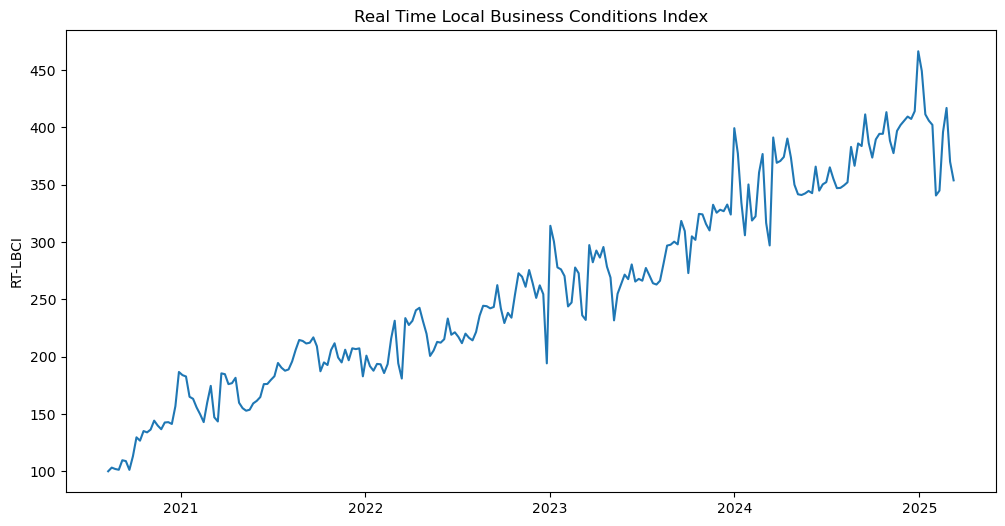

In [4]:
# Plot the time series data
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='date', y='value')
plt.title('Real Time Local Business Conditions Index')
plt.ylabel('RT-LBCI')
plt.xlabel('')
plt.show()

Chart above shows a long-term trend with peaks and troughs along the way. We can intuitively say that this time series is not a stationary process, since we can observe a trend
over time. Furthermore, there is no apparent cyclical pattern in the data, so we can rule out any seasonal effects.

We can perform the augmented Dickey-Fuller test to confirm that this si not a stationary time series.

The ADF test verifies the null hypothesis that there is a unit root present in a time series (which means the time series is not stationary).

In [5]:
rtlbci_ADF_result = adfuller(df['value'])
print(f'ADF Statistic: {rtlbci_ADF_result[0]}')
print(f'p-value: {rtlbci_ADF_result[1]}')

ADF Statistic: -1.355374629246757
p-value: 0.6034734187442681


We see that p-value > 0.05, so we know that our data is not stationary. Hence, we will difference out data to see if that makes it statinoary.

In [6]:
diff_rtlbci = np.diff(df['value'], n=1) # numpy array

In [7]:
rtlbci_diff_ADF_result = adfuller(diff_rtlbci)
print(f'ADF Statistic: {rtlbci_diff_ADF_result[0]}')
print(f'p-value: {rtlbci_diff_ADF_result[1]}')

ADF Statistic: -9.394329347491725
p-value: 6.434818318157671e-16


Now p-value < 0.05, hence the series is now stationary. Now we can plot the autocorrelation function and see if there is autocorrelation.

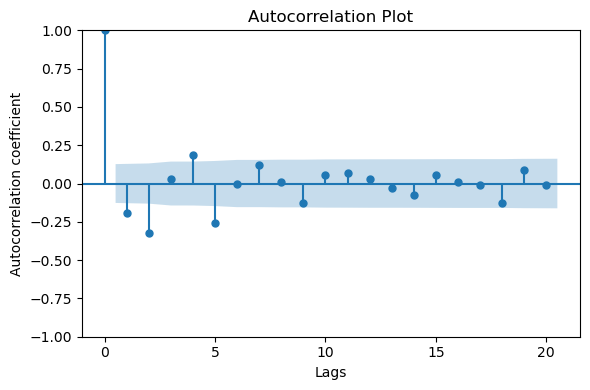

In [8]:
fig, ax = plt.subplots(figsize=(6, 4))
plot_acf(diff_rtlbci, lags=20, ax=ax)

ax.set_xlabel("Lags")
ax.set_ylabel("Autocorrelation coefficient")
ax.set_title("Autocorrelation Plot")

plt.tight_layout()
plt.show()

We see that there are significant coefficients at lags 2, 3, 5, 6. Therefore, we can conclude that the RT-LBCI cannot be approximated by a random walk process. Taking the first difference makes the series stationary, and its ACF plot shows autocorrelation, meaning that it not random. Since it is not random, we can apply statistical learning models to it for prediction.

In such a situation, we are facing a process that can be approximated by the moving average (MA) model, an autoregressive (AR) model, or the combination of both processes, leading to an autoregressive moving average (ARMA) model.